# Capstone Project: Exploratory Data Analysis - Inferential Statistics

### Learning Objectives:

- Identify variables in the data to answer to a project question.
- Identify strong correlations between pairs of independent variables or between an independent and a dependent variable. 
- Practice identifying the most appropriate tests to use to analyze relationships between variables.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

df = pd.read_csv('labeled_schefter_tweets.csv')

df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by='Date')
df = df.set_index('Date')

df.head()

,Timestamp,DoW,Month,Day,Time,Year,Class,Tweet
Date,,,,,,,,
2010-01-01,Jan 01 2010 18:03:28,Fri,Jan,1,18:03:28,2010,I,John Clayton reports Josh McDaniels officially...
2010-01-01,Jan 01 2010 18:57:12,Fri,Jan,1,18:57:12,2010,I,PART 1: HC Josh McDaniels' said WR Brandon Mar...
2010-01-01,Jan 01 2010 18:58:33,Fri,Jan,1,18:58:33,2010,X,"PART II -- McDaniels: ""We're all accountable t..."
2010-01-01,Jan 01 2010 22:34:42,Fri,Jan,1,22:34:42,2010,T,Browns were awarded defensive lineman Titus Ad...
2010-01-01,Jan 01 2010 14:35:50,Fri,Jan,1,14:35:50,2010,X,Good morning Twitterverse and 2010. Some info ...


In [2]:
df.tail()

,Timestamp,DoW,Month,Day,Time,Year,Class,Tweet
Date,,,,,,,,
2019-04-17,Apr 17 2019 14:01:31,Wed,Apr,17,14:01:31,2019,X,Bengals will play the Los Angeles Rams on Sund...
2019-04-17,Apr 17 2019 11:50:39,Wed,Apr,17,11:50:39,2019,X,On the final day of visits for prospective dra...
2019-04-17,Apr 17 2019 00:09:38,Wed,Apr,17,00:09:38,2019,T,Bears’ TE Zach Miller officially is retiring n...
2019-04-17,Apr 17 2019 14:03:20,Wed,Apr,17,14:03:20,2019,X,"Monday Night Football, Monday Nov. 18:\n\nChie..."
2019-04-17,Apr 17 2019 14:07:36,Wed,Apr,17,14:07:36,2019,X,"Bears will face the Oakland Raiders on Sunday,..."


Text(0, 0.5, 'Frequency')

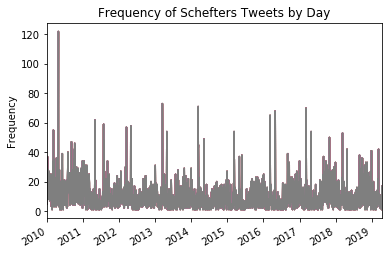

In [3]:
counts = df.groupby(['Date']).agg(len)
counts.plot(legend = False)
plt.title('Frequency of Schefters Tweets by Day')
plt.xlabel('')
plt.ylabel('Frequency')

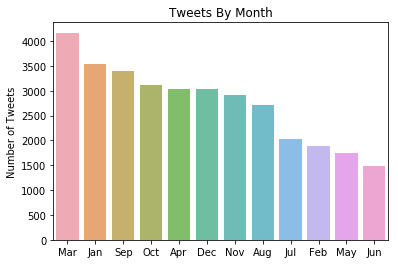

In [4]:
import seaborn as sns

bymonth = df['Month'].value_counts()
sns.barplot(bymonth.index, bymonth.values, alpha=0.8)
plt.title("Tweets By Month")
plt.ylabel("Number of Tweets")
plt.show()

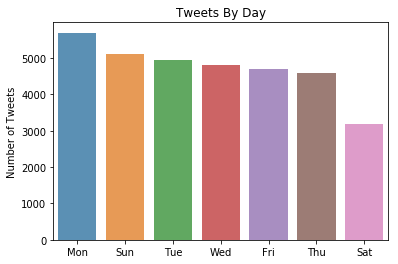

In [5]:
byday = df['DoW'].value_counts()
sns.barplot(byday.index, byday.values, alpha=0.8)
plt.title("Tweets By Day")
plt.ylabel("Number of Tweets")
plt.show()

My dataset is strictly derived from an individual Twitter account and contains only information regarding the text of tweets and the time each was published. However, I'm not initially interested in using any information regarding time since I only care whether an incoming tweet can be considered relevant or not based on its content. By relevant, I mean it fits my definition for an 'I' (injury-related) tweet or a 'T' (transactional) tweet. Therefore, the only variables I care about are the individual words or phrases that can help decide whether a tweet fits one of my two pre-defined categories.

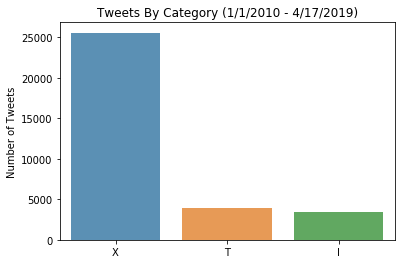

In [6]:
bycat = df['Class'].value_counts()

sns.barplot(bycat.index, bycat.values, alpha=0.8)
plt.title('Tweets By Category (1/1/2010 - 4/17/2019)')
plt.ylabel('Number of Tweets')
plt.show()

In [7]:
allfreq = df.Tweet.str.split(expand=True).stack().value_counts()

# view his most used words
allfreq.head(15)

to      15356
the     12046
and      9201
a        8596
in       7429
for      7192
on       6631
is       6243
of       5617
with     5006
RT       3940
will     3899
per      3705
his      3176
be       3112
dtype: int64

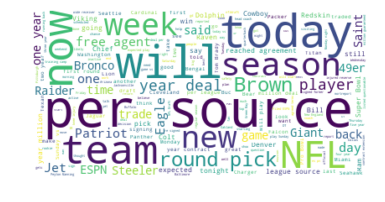

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(tweet for tweet in df.Tweet)

stopwords = set(STOPWORDS)
stopwords.update(["https", "co", "RT"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [5]:
itweets = df['Class'] == 'I' # create Boolean list
itweets2 = df[itweets]
ifreq = itweets2.Tweet.str.split(expand=True).stack().value_counts()
ifreq.head(15)

to      1725
is      1301
a       1040
for     1013
will     947
and      911
WR       744
his      707
RB       689
per      673
play     621
the      570
with     547
out      540
as       536
dtype: int64

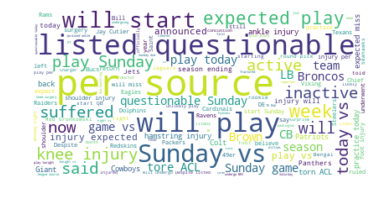

In [10]:
text = " ".join(tweet for tweet in itweets2.Tweet)

wordcloud = WordCloud(background_color="white", stopwords = stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [3]:
ttweets = df['Class'] == 'T' # create Boolean list
ttweets2 = df[ttweets]
tfreq = ttweets2.Tweet.str.split(expand=True).stack().value_counts()

tfreq.head(15)

to           1576
a            1440
and          1237
on           1142
signed       1058
the          1017
with         1003
per           818
former        699
for           653
have          622
WR            575
source.       540
released      518
agreement     514
dtype: int64

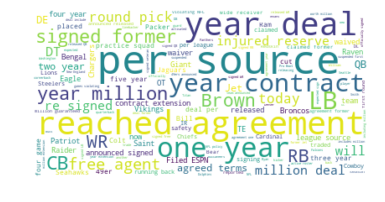

In [12]:
text = " ".join(tweet for tweet in ttweets2.Tweet)

wordcloud = WordCloud(background_color="white", stopwords=stopwords).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Question to explore: What does an irrelevant tweet look like?

### Average length of tweet (in words)

In [6]:
df['word_count'] = df['Tweet'].apply(lambda x: len(str(x).split(" ")))
ttweets2['word_count'] = ttweets2['Tweet'].apply(lambda x: len(str(x).split(" ")))
itweets2['word_count'] = itweets2['Tweet'].apply(lambda x: len(str(x).split(" ")))
xtweets = df['Class'] == 'X'
xtweets2 = df[xtweets]
xtweets2['word_count'] = xtweets2['Tweet'].apply(lambda x: len(str(x).split(" ")))

print('Average length of all tweets:', df.word_count.mean())
print('Average length of transactional tweets:', ttweets2.word_count.mean())
print('Average length of injury-related tweets:', itweets2.word_count.mean())
print('Average length of irrelevant tweets:', xtweets2.word_count.mean())

Average length of all tweets: 17.790078992766563
Average length of transactional tweets: 15.506787330316742
Average length of injury-related tweets: 18.182391740751363
Average length of irrelevant tweets: 18.091726618705035


### Average length of tweet in characters (including spaces)

In [7]:
df['char_count'] = df['Tweet'].str.len() # includes spaces
ttweets2['char_count'] = ttweets2['Tweet'].str.len()
itweets2['char_count'] = itweets2['Tweet'].str.len()
xtweets2['char_count'] = xtweets2['Tweet'].str.len()

print('Average number of characters for all tweets:', df.char_count.mean())
print('Average number of characters for transactional tweets:', ttweets2.char_count.mean())
print('Average number of characters for injury-related tweets:', itweets2.char_count.mean())
print('Average number of characters for irrelevant tweets:', xtweets2.char_count.mean())

Average number of characters for all tweets: 110.65206864199025
Average number of characters for transactional tweets: 97.39165409753645
Average number of characters for injury-related tweets: 110.21508459994264
Average number of characters for irrelevant tweets: 112.77412417891773


### Maximum and minimum word length

In [21]:
print('Maximum length of transactional tweets:', ttweets2.word_count.max())
print('Minimum length of transactional tweets:', ttweets2.word_count.min())
print('Maximum length of injury-related tweets:', itweets2.word_count.max())
print('Minimum length of injury-related tweets:', itweets2.word_count.min())
print('Maximum length of irrelevant tweets:', xtweets2.word_count.max())
print('Minimum length of irrelevant tweets:', xtweets2.word_count.min())

Maximum length of transactional tweets: 43
Minimum length of transactional tweets: 4
Maximum length of injury-related tweets: 30
Minimum length of injury-related tweets: 3
Maximum length of irrelevant tweets: 68
Minimum length of irrelevant tweets: 1


### Maximum and minimum character counts

In [23]:
print('Maximum number of characters for transactional tweets:', ttweets2.char_count.max())
print('Minimum number of characters for transactional tweets:', ttweets2.char_count.min())
print('Maximum number of characters for injury-related tweets:', itweets2.char_count.max())
print('Minimum number of characters for injury-related tweets:', itweets2.char_count.min())
print('Maximum number of characters for irrelevant tweets:', xtweets2.char_count.max())
print('Minimum number of characters for irrelevant tweets:', xtweets2.char_count.min())

Maximum number of characters for transactional tweets: 140
Minimum number of characters for transactional tweets: 24
Maximum number of characters for injury-related tweets: 140
Minimum number of characters for injury-related tweets: 16
Maximum number of characters for irrelevant tweets: 148
Minimum number of characters for irrelevant tweets: 1


### Average number of stopwords

In [26]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

df['stopwords'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
ttweets2['stopwords'] = ttweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
itweets2['stopwords'] = itweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
xtweets2['stopwords'] = xtweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))

print('Average number of stopwords for all tweets:', df[['Tweet','stopwords']].mean())
print('Average number of stopwords for transactional tweets:', ttweets2[['Tweet','stopwords']].mean())
print('Average number of stopwords for injury-related tweets:', itweets2[['Tweet','stopwords']].mean())
print('Average number of stopwords for irrelevant tweets:', xtweets2[['Tweet','stopwords']].mean())

[nltk_data] Downloading package stopwords to /Users/lel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average number of stopwords for all tweets: stopwords    4.697315
dtype: float64
Average number of stopwords for transactional tweets: stopwords    3.469583
dtype: float64
Average number of stopwords for injury-related tweets: stopwords    4.786063
dtype: float64
Average number of stopwords for irrelevant tweets: stopwords    4.876173
dtype: float64


In [9]:
## Number of hashtags

df['hashtags'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
ttweets2['hashtags'] = ttweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
itweets2['hashtags'] = itweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
xtweets2['hashtags'] = xtweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

print('Average number of hashtags per tweet:', df[['Tweet','hashtags']].mean())
print('Average number of hashtags per transactional tweet:', ttweets2[['Tweet','hashtags']].mean())
print('Average number of hashtags per injury-related tweet:', itweets2[['Tweet','hashtags']].mean())
print('Average number of hashtags per irrelevant tweet:', xtweets2[['Tweet','hashtags']].mean())

Average number of hashtags per tweet: hashtags    0.026513
dtype: float64
Average number of hashtags per transactional tweet: hashtags    0.004776
dtype: float64
Average number of hashtags per injury-related tweet: hashtags    0.001721
dtype: float64
Average number of hashtags per irrelevant tweet: hashtags    0.033273
dtype: float64


### Average frequency of @ signs

In [10]:
## Number of @ symbols

df['hashtags'] = df['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
ttweets2['hashtags'] = ttweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
itweets2['hashtags'] = itweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
xtweets2['hashtags'] = xtweets2['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))

print('Average number of hashtags per tweet:', df[['Tweet','hashtags']].mean())
print('Average number of hashtags per transactional tweet:', ttweets2[['Tweet','hashtags']].mean())
print('Average number of hashtags per injury-related tweet:', itweets2[['Tweet','hashtags']].mean())
print('Average number of hashtags per irrelevant tweet:', xtweets2[['Tweet','hashtags']].mean())

Average number of hashtags per tweet: hashtags    0.233135
dtype: float64
Average number of hashtags per transactional tweet: hashtags    0.099045
dtype: float64
Average number of hashtags per injury-related tweet: hashtags    0.104961
dtype: float64
Average number of hashtags per irrelevant tweet: hashtags    0.271465
dtype: float64


## Answer: What does an irrelevant tweet look like?

After getting a sense for what words are most characteristic of each class of Tweet, we next looked at the makeup of each class independent of the underlying words. A few observations can be made:


1. 'T' tweets tend to be significantly shorter than any other class in terms of both word count, character count, and stopword count. Meanwhile, 'I' tweets tend to be slightly longer than the average irrelevant tweet.

2. All relevant tweets ('T' and 'I') have at least three words but can still take up the entire 140-character max that Twitter allows.

3. The presence of special characters like # and @ is much more common in irrelevant tweets.

### Fitting NB model out of curiosity

In [16]:
import pandas as pd
import numpy as np
 
import sklearn.model_selection
import sklearn.feature_extraction.text
import sklearn.metrics
import sklearn.naive_bayes


train, test = sklearn.model_selection.train_test_split(df, train_size=0.7)
train_data, test_data = pd.DataFrame(train, columns=['Tweet', 'Class']), pd.DataFrame(test, columns=['Tweet', 'Class'])

vectorizer = sklearn.feature_extraction.text.CountVectorizer(stop_words='english')

train_matrix = vectorizer.fit_transform(train_data['Tweet'])
test_matrix = vectorizer.transform(test_data['Tweet'])

relevant_tweets_train = (train_data['Class'] != 'X')
relevant_tweets_test = (test_data['Class'] != 'X')

classifier = sklearn.naive_bayes.MultinomialNB()
classifier.fit(train_matrix, relevant_tweets_train)

predicted_tweets = classifier.predict(test_matrix)
predicted_probs = classifier.predict_proba(test_matrix)

accuracy = classifier.score(test_matrix, relevant_tweets_test)
precision, recall, f1, _ = sklearn.metrics.precision_recall_fscore_support(
relevant_tweets_test, predicted_tweets)

print(" ")
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1 Score", f1)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


 
Accuracy = 0.882376677090689
Precision = [0.94922524 0.70242086]
Recall = [0.89569191 0.83710608]
F1 Score [0.92168189 0.76387201]


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")